<a href="https://colab.research.google.com/github/ricardoBatista77/Business-IA/blob/master/Aula_de_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

uri="https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula4.1/movies.csv"
filmes=pd.read_csv(uri)
filmes.columns=["filmeId","titulo","generos"]
filmes=filmes.set_index('filmeId')
filmes=filmes.join(filmes['generos'].str.get_dummies()).drop('generos',axis=1)
filmes['ano']=filmes['titulo'].str.extract(r'.*\((\d+)\)')
filmes=filmes.dropna()
#filmes.head()

In [0]:
uri="https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula4.1/ratings.csv"
notas=pd.read_csv(uri)
notas.columns=["usuarioId","filmesId","nota","momento"]
arredondadas=notas['nota'].round(1)
#notas.head()


In [0]:
medias=notas.groupby('filmesId')['nota'].mean()
filmes=filmes.join(medias).dropna().sort_values('nota',ascending=False).rename(columns={'nota': 'media'})

total=notas.groupby('filmesId')['momento'].count()
filmes=filmes.join(total)
filmes=filmes.rename(columns={'momento':'total'})
filmes=filmes.query("total > 50")
filmes['media_categoria]']=(filmes['media']).round(1).sort_values

random_filmes=filmes.sample(10)
#random_filmes.head()

In [4]:
filmes.head()

,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,ano,media,total,media_categoria]
filmeId,,,,,,,,,,,,,,,,,,,,,,,,,
318,"Shawshank Redemption, The (1994)",0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1994,4.429022,317,<bound method Series.sort_values of filmeId\n3...
858,"Godfather, The (1972)",0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1972,4.289062,192,<bound method Series.sort_values of filmeId\n3...
2959,Fight Club (1999),0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1999,4.272936,218,<bound method Series.sort_values of filmeId\n3...
1276,Cool Hand Luke (1967),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1967,4.271930,57,<bound method Series.sort_values of filmeId\n3...
750,Dr. Strangelove or: How I Learned to Stop Worr...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1964,4.268041,97,<bound method Series.sort_values of filmeId\n3...


In [5]:
random_filmes

,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,ano,media,total,media_categoria]
filmeId,,,,,,,,,,,,,,,,,,,,,,,,,
6,Heat (1995),0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1995,3.946078,102,<bound method Series.sort_values of filmeId\n3...
329,Star Trek: Generations (1994),0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1994,3.393519,108,<bound method Series.sort_values of filmeId\n3...
1136,Monty Python and the Holy Grail (1975),0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1975,4.161765,136,<bound method Series.sort_values of filmeId\n3...
2329,American History X (1998),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1998,4.217054,129,<bound method Series.sort_values of filmeId\n3...
1732,"Big Lebowski, The (1998)",0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1998,3.924528,106,<bound method Series.sort_values of filmeId\n3...
2712,Eyes Wide Shut (1999),0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1999,3.462264,53,<bound method Series.sort_values of filmeId\n3...
1127,"Abyss, The (1989)",0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1989,3.475806,62,<bound method Series.sort_values of filmeId\n3...
3081,Sleepy Hollow (1999),0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1999,3.475806,62,<bound method Series.sort_values of filmeId\n3...
903,Vertigo (1958),0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1958,4.025000,60,<bound method Series.sort_values of filmeId\n3...


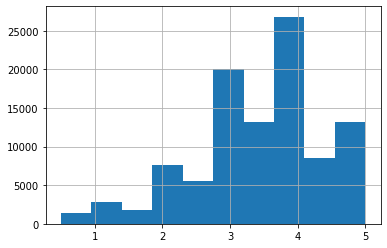

In [6]:
notas['nota'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb71efa3c8>,
      dtype=object)

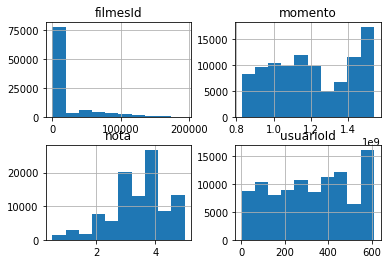

In [7]:
notas.hist()

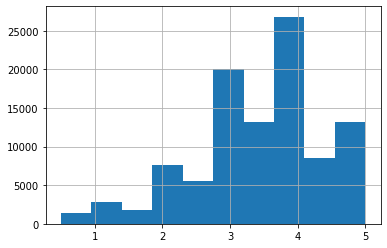

In [8]:
notas['nota'].hist()

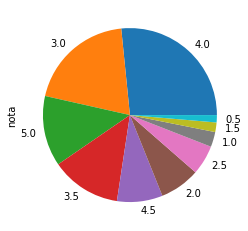

In [9]:
arredondadas.value_counts().plot.pie()

In [10]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


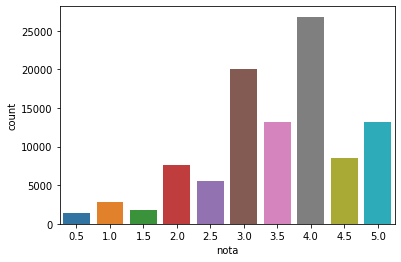

In [11]:
sns.countplot(arredondadas)

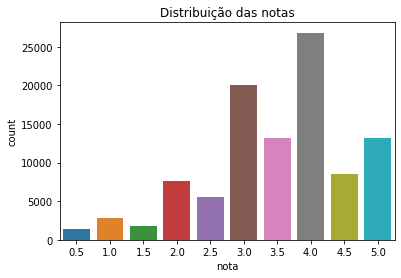

In [12]:
import matplotlib.pyplot as plt

sns.countplot(arredondadas)
plt.title("Distribuição das notas");

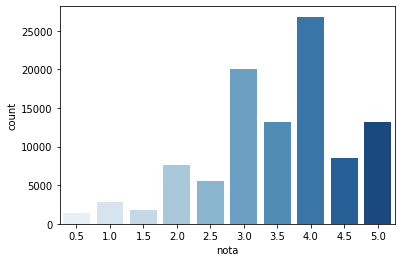

In [13]:
palette=sns.color_palette("Blues",10)
sns.countplot(arredondadas, palette=palette)

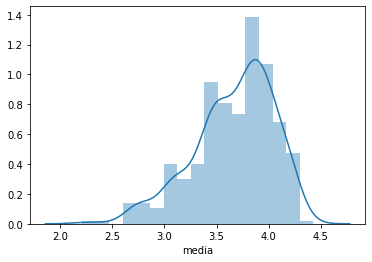

In [14]:
sns.distplot(filmes['media'])

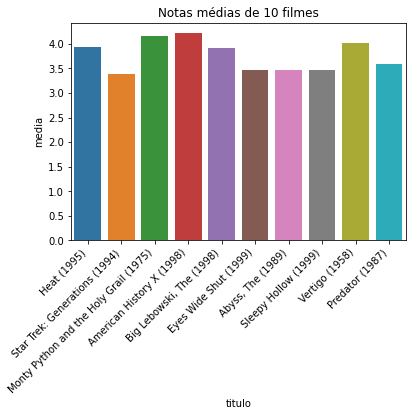

In [15]:
p=sns.barplot(data=random_filmes, x="titulo",y="media")
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.title("Notas médias de 10 filmes")
plt.show()

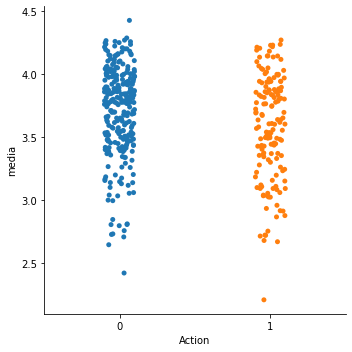

In [16]:
sns.catplot(data=filmes, x="Action", y="media")

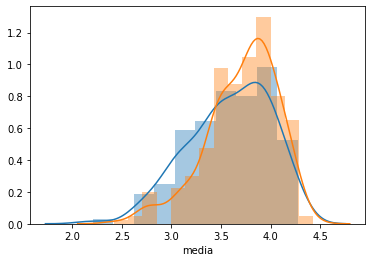

In [17]:
sns.distplot(filmes.query("Action==1")['media'])
sns.distplot(filmes.query("Action==0")['media'])